# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Import data

In [2]:
data = pd.read_csv('data.csv')
data.drop(columns=['Day Of Week'], inplace=True)

In [3]:
# Calculate the amount of missing data (in terms of %) that can be found in each field
data.isnull().sum()/len(data)

Vehicle Reg No         0.010618
Mall                   0.000000
Place Type             0.000000
Entry Month            0.000000
Entry Day              0.000000
Entry Year             0.000000
Entry Hour             0.000000
Parking Duration       0.000000
Parking Location       0.002413
Vehicle Type           0.050676
Activity               0.424228
Refrigerated           0.173745
Commodity              0.527510
Payload(%)             0.455598
Initial Payload(%)     0.737452
Delivery Volume(m3)    0.472973
Pickup Volume(m3)      0.549710
Single/Bundle          0.052606
No of Workers          0.562741
Store Count            0.653958
Mall Count             0.934363
Employer               0.638514
No of Tours            0.839286
No of Stops/Tour       0.980212
Is Service Vehicle     0.973938
System Occupancy       0.233108
Source                 0.000000
dtype: float64

# Remove outliers from the dataset based on the distribution of parking duration

Text(0,0.5,'Proportion')

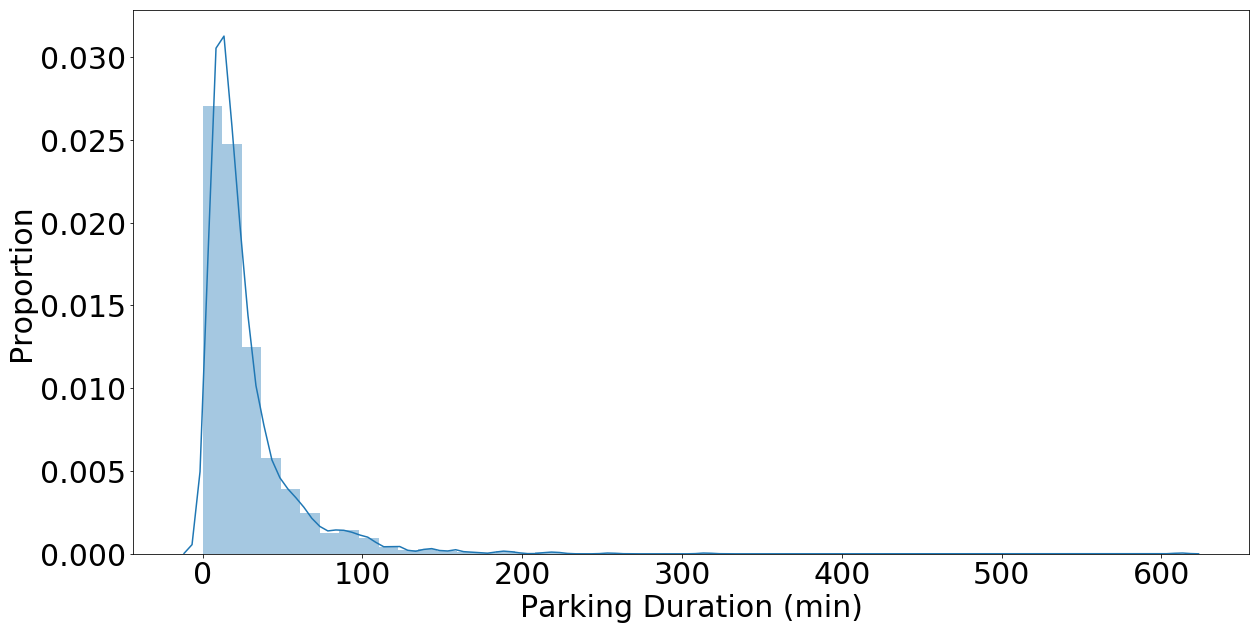

In [4]:
# Plotting distribution graph
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 30})
sns.distplot(data['Parking Duration'])
plt.xlabel('Parking Duration (min)')
plt.ylabel('Proportion')

By plotting the distribution of the parking duration, it is observed that the dataset suffers from a "long tail" problem whereby a tiny percentage of the vehicles reported unusually large values for their parking durations. These extreme cases, if left in the dataset, could potentially prevent generator 𝐺 from learning the true distribution of the missing features, thereby producing a prediction model that learns from incorrect data and hence fails to generalise well to future unseen data. Therefore, to address this potential problem, a cutoff boundary was set such that any delivery with a parking duration that falls beyond two standard deviations from the mean will be considered as an outlier and removed from the dataset.

In [5]:
# Calculating mean and standard deviation of parking duration
duration_stddev = np.std(data['Parking Duration'].values)
duration_mean = np.mean(data['Parking Duration'].values)

print('Parking Duration Mean: {}'.format(duration_mean))
print('Parking Duration Std Dev: {}'.format(duration_stddev))

Parking Duration Mean: 27.505960424833493
Parking Duration Std Dev: 31.280835683700303


In [6]:
# Removing the outliers that fall more than 2 standard deviations away from the mean
dropped_index = []
for i in range(len(data)):
    if data.loc[i,'Parking Duration'] > duration_mean + 2 * duration_stddev:
        dropped_index.append(i)
        
clean_data = data.drop(index=dropped_index).reset_index(drop=True)

print('Original Number of Data Points: {}'.format(len(data)))
print('Final Number of Data Points: {}'.format(len(clean_data)))
print('Number of data points dropped: {}%'.format(100*(1-(len(clean_data)/len(data)))))

Original Number of Data Points: 2072
Final Number of Data Points: 1983
Number of data points dropped: 4.295366795366795%


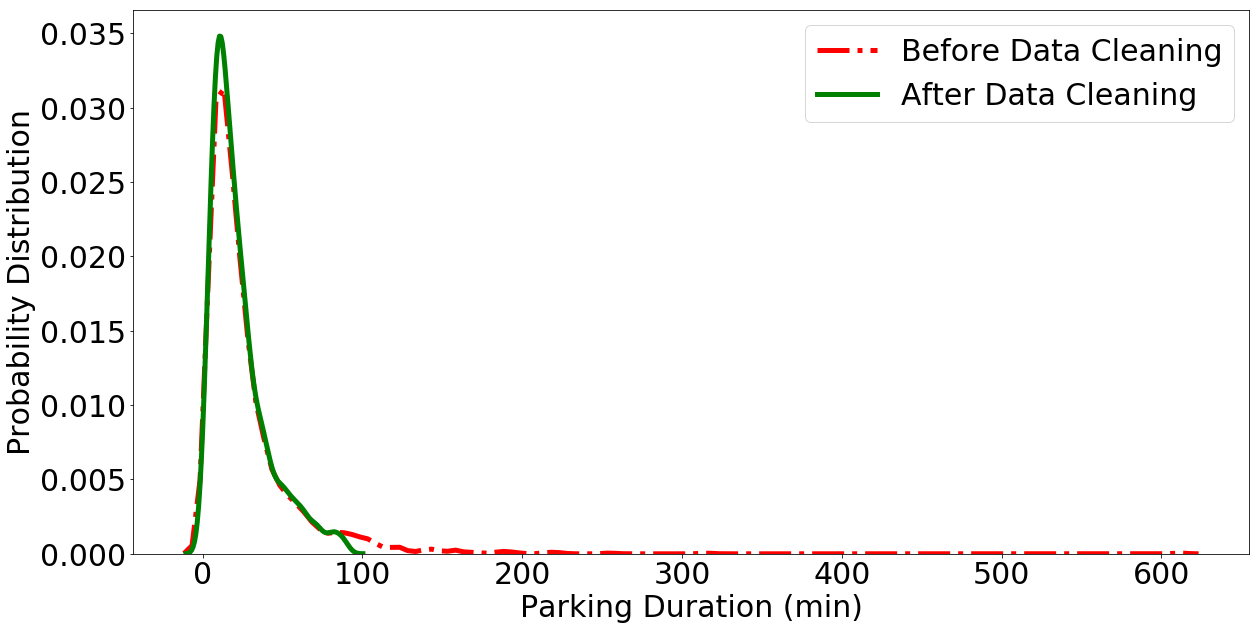

In [7]:
# Plotting the new parking duration distribution before and after outliers have been removed.
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 30})
sns.set_context(rc={"lines.linewidth": 5.0})
sns.distplot(data['Parking Duration'], label='Before Data Cleaning', hist=False, kde_kws={'linestyle':'-.'}, color='red')
sns.distplot(clean_data['Parking Duration'], label='After Data Cleaning', hist=False, color='green')
plt.xlabel('Parking Duration (min)')
plt.ylabel('Probability Distribution')
plt.legend()
# plt.savefig('parkingduration.png', dpi=600)

# Discretise the numerical features

The numerical features that can be found in the dataset are Delivery Volume(m3), Pickup Volume(m3), Number of Workers, Store Count, Mall Count, No of Tours, No of Stops/Tour, and System Occupancy.

These features will be discretised into 2-4 categories and the cutoff value between each category will be set based on the 25%, 50% and 75% quantile values.

In [8]:
# Discretising delivery volume(m3) feature
dropped_index = []
for i in range(len(clean_data)):
    if clean_data.loc[i,'Delivery Volume(m3)'] == 0:
        dropped_index.append(i)

temp_data = clean_data.drop(index=dropped_index).reset_index()

Q1 = temp_data['Delivery Volume(m3)'].quantile(0.25)
Q2 = temp_data['Delivery Volume(m3)'].quantile(0.5)
Q3 = temp_data['Delivery Volume(m3)'].quantile(0.75)

print('Quantile values for Delivery Volume(m3)')
print('25th Quantile: {}'.format(Q1))
print('50th Quantile: {}'.format(Q2))
print('75th Quantile: {}'.format(Q3))

for i in range(len(clean_data)):
    deliver_vol = clean_data.loc[i,'Delivery Volume(m3)']
    if deliver_vol <= Q1:
        clean_data.loc[i,'Delivery Volume(m3)'] = 1
    elif deliver_vol > Q1 and deliver_vol <= Q2:
        clean_data.loc[i,'Delivery Volume(m3)'] = 2
    elif deliver_vol > Q2 and deliver_vol <= Q3:
        clean_data.loc[i,'Delivery Volume(m3)'] = 3
    elif deliver_vol > Q3:
        clean_data.loc[i,'Delivery Volume(m3)'] = 4
    else:
        continue

Quantile values for Delivery Volume(m3)
25th Quantile: 0.2875
50th Quantile: 0.8
75th Quantile: 2.0


In [9]:
# Discretising pickup volume(m3) feature
dropped_index = []
for i in range(len(clean_data)):
    if clean_data.loc[i,'Pickup Volume(m3)'] == 0:
        dropped_index.append(i)

temp_data = clean_data.drop(index=dropped_index).reset_index()

Q1 = temp_data['Pickup Volume(m3)'].quantile(0.25)
Q2 = temp_data['Pickup Volume(m3)'].quantile(0.5)
Q3 = temp_data['Pickup Volume(m3)'].quantile(0.75)

print('Quantile values for Pickup Volume(m3)')
print('25th Quantile: {}'.format(Q1))
print('50th Quantile: {}'.format(Q2))
print('75th Quantile: {}'.format(Q3))

for i in range(len(clean_data)):
    pickup_vol = clean_data.loc[i,'Pickup Volume(m3)']
    if pickup_vol <= Q1:
        clean_data.loc[i,'Pickup Volume(m3)'] = 1
    elif pickup_vol > Q1 and pickup_vol <= Q2:
        clean_data.loc[i,'Pickup Volume(m3)'] = 2
    elif pickup_vol > Q2 and pickup_vol <= Q3:
        clean_data.loc[i,'Pickup Volume(m3)'] = 3
    elif pickup_vol > Q3:
        clean_data.loc[i,'Pickup Volume(m3)'] = 4
    else:
        continue

Quantile values for Pickup Volume(m3)
25th Quantile: 0.25
50th Quantile: 1.0
75th Quantile: 2.0


In [10]:
# Discretising number of workers feature
Q1 = temp_data['No of Workers'].quantile(0.25)
Q2 = temp_data['No of Workers'].quantile(0.5)
Q3 = temp_data['No of Workers'].quantile(0.75)

print('Quantile values for No of Workers')
print('25th Quantile: {}'.format(Q1))
print('50th Quantile: {}'.format(Q2))
print('75th Quantile: {}'.format(Q3))

for i in range(len(clean_data)):
    num_workers = clean_data.loc[i,'No of Workers']
    if num_workers <= Q1:
        clean_data.loc[i,'No of Workers'] = 1
    elif num_workers > Q1 and num_workers <= Q3:
        clean_data.loc[i,'No of Workers'] = 2
    elif num_workers > Q3:
        clean_data.loc[i,'No of Workers'] = 3
    else:
        continue

Quantile values for No of Workers
25th Quantile: 1.0
50th Quantile: 1.0
75th Quantile: 2.0


In [11]:
# Discretising store count feature
Q1 = temp_data['Store Count'].quantile(0.25)
Q2 = temp_data['Store Count'].quantile(0.5)
Q3 = temp_data['Store Count'].quantile(0.75)

print('Quantile values for Store Count')
print('25th Quantile: {}'.format(Q1))
print('50th Quantile: {}'.format(Q2))
print('75th Quantile: {}'.format(Q3))

for i in range(len(clean_data)):
    store_count = clean_data.loc[i,'Store Count']
    if store_count <= Q3:
        clean_data.loc[i,'Store Count'] = 1
    elif store_count > Q3:
        clean_data.loc[i,'Store Count'] = 2
    else:
        continue

Quantile values for Store Count
25th Quantile: 1.0
50th Quantile: 1.0
75th Quantile: 1.0


In [12]:
# Discretising mall count feature
Q1 = temp_data['Mall Count'].quantile(0.25)
Q2 = temp_data['Mall Count'].quantile(0.5)
Q3 = temp_data['Mall Count'].quantile(0.75)

print('Quantile values for Mall Count')
print('25th Quantile: {}'.format(Q1))
print('50th Quantile: {}'.format(Q2))
print('75th Quantile: {}'.format(Q3))

for i in range(len(clean_data)):
    mall_count = clean_data.loc[i,'Mall Count']
    if mall_count <= Q1:
        clean_data.loc[i,'Mall Count'] = 1
    elif mall_count > Q1 and mall_count <= Q2:
        clean_data.loc[i,'Mall Count'] = 2
    elif mall_count > Q2 and mall_count <= Q3:
        clean_data.loc[i,'Mall Count'] = 3
    elif mall_count > Q3:
        clean_data.loc[i,'Mall Count'] = 4
    else:
        continue

Quantile values for Mall Count
25th Quantile: 1.0
50th Quantile: 2.0
75th Quantile: 5.0


In [13]:
# Discretising number of tours feature
Q1 = temp_data['No of Tours'].quantile(0.25)
Q2 = temp_data['No of Tours'].quantile(0.5)
Q3 = temp_data['No of Tours'].quantile(0.75)

print('Quantile values for No of Tours')
print('25th Quantile: {}'.format(Q1))
print('50th Quantile: {}'.format(Q2))
print('75th Quantile: {}'.format(Q3))

for i in range(len(clean_data)):
    num_tours = clean_data.loc[i,'No of Tours']
    if num_tours <= Q1:
        clean_data.loc[i,'No of Tours'] = 1
    elif num_tours > Q1 and num_tours <= Q3:
        clean_data.loc[i,'No of Tours'] = 2
    elif num_tours > Q3:
        clean_data.loc[i,'No of Tours'] = 3
    else:
        continue

Quantile values for No of Tours
25th Quantile: 1.0
50th Quantile: 1.0
75th Quantile: 2.0


In [14]:
# Discretising number of stops per tour feature
Q1 = temp_data['No of Stops/Tour'].quantile(0.25)
Q2 = temp_data['No of Stops/Tour'].quantile(0.5)
Q3 = temp_data['No of Stops/Tour'].quantile(0.75)

print('Quantile values for No of Stops/Tour')
print('25th Quantile: {}'.format(Q1))
print('50th Quantile: {}'.format(Q2))
print('75th Quantile: {}'.format(Q3))

for i in range(len(clean_data)):
    stops_per_tour = clean_data.loc[i,'No of Stops/Tour']
    if stops_per_tour <= Q1:
        clean_data.loc[i,'No of Stops/Tour'] = 1
    elif stops_per_tour > Q1 and stops_per_tour <= Q2:
        clean_data.loc[i,'No of Stops/Tour'] = 2
    elif stops_per_tour > Q2 and stops_per_tour <= Q3:
        clean_data.loc[i,'No of Stops/Tour'] = 3
    elif stops_per_tour > Q3:
        clean_data.loc[i,'No of Stops/Tour'] = 4
    else:
        continue

Quantile values for No of Stops/Tour
25th Quantile: 5.0
50th Quantile: 10.0
75th Quantile: 17.5


In [15]:
# Discretising system occupancy feature
Q1 = temp_data['System Occupancy'].quantile(0.25)
Q2 = temp_data['System Occupancy'].quantile(0.5)
Q3 = temp_data['System Occupancy'].quantile(0.75)

print('Quantile values for System Occupancy')
print('25th Quantile: {}'.format(Q1))
print('50th Quantile: {}'.format(Q2))
print('75th Quantile: {}'.format(Q3))

for i in range(len(clean_data)):
    system_occup = clean_data.loc[i,'System Occupancy']
    if system_occup <= Q1:
        clean_data.loc[i,'System Occupancy'] = 1
    elif system_occup > Q1 and system_occup <= Q2:
        clean_data.loc[i,'System Occupancy'] = 2
    elif system_occup > Q2 and system_occup <= Q3:
        clean_data.loc[i,'System Occupancy'] = 3
    elif system_occup > Q3:
        clean_data.loc[i,'System Occupancy'] = 4
    else:
        continue

Quantile values for System Occupancy
25th Quantile: 10.0
50th Quantile: 16.0
75th Quantile: 21.0


# Perform one hot encoding for the categorical input features

In [16]:
def onehotencode(data, category_list, column_list):
    """
    Performs one hot encoding of each categorical field and takes into account 
    of missing values by replacing missing values with np.nan.
    """
    encoded_dataframe = pd.get_dummies(data, columns=category_list, dummy_na=True)
    for i in range(len(encoded_dataframe)):
        if encoded_dataframe.iloc[i, -1] == 1:  # condition for missing values
            encoded_dataframe.loc[i, category_list] = np.nan

    encoded_dataframe.drop(encoded_dataframe.columns[len(encoded_dataframe.columns) - 1], axis=1, inplace=True)
    encoded_dataframe.columns = column_list
    return encoded_dataframe

In [17]:
mall_categories = ['Mall A','Mall B','Mall C','Mall D','Mall E','Mall F','Mall G','Mall H','Mall I']
hour_categories = ['0100-0200','0500-0600','0600-0700','0700-0800','0800-0900','0900-1000','1000-1100','1100-1200','1200-1300','1300-1400','1400-1500','1500-1600','1600-1700','1700-1800']
parkinglocation_categories = ['CP','LB','Street']
vehicle_categories = ['Truck','Van']
activity_categories = ['Deliver','Pickup','PickupDeliver','Service']
refrigated_categories = ['Y','N']
commodity_categories = ['Clothing and Accessories','Cosmetics and Cleaning','Electronics','Fresh and Frozen Food','Gardening and Pets','Household','Jewelry','Nonperishable Food','Optics and Photography','Others','Pharmaceutical','Prepared Food','Recreational Goods','Service and Trash','Stationery']
payload_categories = ['0-25','25-50','50-75','75-100']
singlebundle_categories = ['Single']
employer_categories = ['Carrier','Receiver','Retailer','Shipper','Supplier','Transport Provider']
service_categories = ['Y']
deliver_categories = [1,2,3,4]
pickup_categories = [1,2,3,4]
worker_count_categories = [1,2,3]
store_count_categories = [1,2]
mall_count_categories = [1,2,3,4]
num_tours_categories = [1,2,3]
stops_per_tour_categories = [1,2,3,4]
occupancy_categories = [1,2,3,4]

data_list = []

data_list.append(onehotencode(clean_data['Mall'], mall_categories, mall_categories))
data_list.append(onehotencode(clean_data['Entry Hour'], hour_categories, hour_categories))
data_list.append(onehotencode(clean_data['Parking Location'], parkinglocation_categories, parkinglocation_categories))
data_list.append(onehotencode(clean_data['Vehicle Type'], vehicle_categories, vehicle_categories))
data_list.append(onehotencode(clean_data['Activity'], activity_categories, activity_categories))
data_list.append(onehotencode(clean_data['Refrigerated'], refrigated_categories, ['Refrigerated_No','Refrigerated_Yes']))
data_list.append(onehotencode(clean_data['Commodity'], commodity_categories, commodity_categories))
data_list.append(onehotencode(clean_data['Payload(%)'], payload_categories, ['Payload_0-25','Payload_25-50','Payload_50-75','Payload_75-100']))
data_list.append(onehotencode(clean_data['Initial Payload(%)'], payload_categories, ['InitPayload_0-25','InitPayload_25-50','InitPayload_50-75','InitPayload_75-100']))
data_list.append(onehotencode(clean_data['Delivery Volume(m3)'], deliver_categories, ['DeliverVolume<=0.3','DeliverVolume<=0.8','DeliverVolume<=2.0','DeliverVolume>2.0']))
data_list.append(onehotencode(clean_data['Pickup Volume(m3)'], pickup_categories, ['PickupVolume<=0.25','PickupVolume<=1.0','PickupVolume<=2.0','PickupVolume>2.0']))
data_list.append(onehotencode(clean_data['Single/Bundle'], singlebundle_categories, singlebundle_categories))
data_list.append(onehotencode(clean_data['No of Workers'], worker_count_categories, ['Workers=1','Workers=2','Workers>2']))
data_list.append(onehotencode(clean_data['Store Count'], store_count_categories, ['StoreCount=1','StoreCount>1']))
data_list.append(onehotencode(clean_data['Mall Count'], mall_count_categories, ['MallCount<=1','MallCount<=2','MallCount<=5','MallCount>5']))
data_list.append(onehotencode(clean_data['Employer'], employer_categories, employer_categories))
data_list.append(onehotencode(clean_data['No of Tours'], num_tours_categories, ['Tours=1','Tours=2','Tours>2']))
data_list.append(onehotencode(clean_data['Is Service Vehicle'], service_categories, ['ServiceTrip_Yes']))
data_list.append(onehotencode(clean_data['No of Stops/Tour'], stops_per_tour_categories, ['Stops/Tour<=5.0','Stops/Tour<=10.0','Stops/Tour<=17.5','Stops/Tour>17.5']))
data_list.append(onehotencode(clean_data['System Occupancy'], occupancy_categories, ['Occupancy<=10','Occupancy<=17','Occupancy<=21','Occupancy>21']))

## Normalise parking duration

In [18]:
def normalise_data(data, column_name):
    """
    Normalises the numerical features to a value between 0 and 1.
    """
    data_array = data.values
    data_array = np.ma.array(data_array, mask=np.isnan(data_array))
    max_value = np.amax(data_array)
    min_value = np.amin(data_array)

    normalised_data = (data_array - min_value) / (max_value - min_value)

    return pd.DataFrame(normalised_data, columns=[column_name])

In [19]:
data_list.append(normalise_data(clean_data['Parking Duration'], 'Normalised_ParkingDuration'))
data_list.append(clean_data['Parking Duration'])

# Save preprocessed data for imputation step

In [20]:
processed_data = pd.concat(data_list, axis=1, sort=False)
processed_data.to_csv('processed_data.csv', index=False)